## Day 11

In [ ]:
import numpy as np
data = open(
    '/content/drive/MyDrive/Colab Notebooks/AOC/2021/day11.txt',
    'r')

mat = []
for line in data.readlines():
    arr = list(line.rstrip())
    mat.append(list(map(int, arr)))

mat = np.array(mat, dtype = np.int8)

In [ ]:
print(mat)

[[6 7 8 8 3 8 3 4 3 6]
 [5 5 2 6 8 2 7 4 4 1]
 [4 5 8 2 4 3 5 8 6 6]
 [5 1 5 2 5 4 7 2 7 3]
 [3 7 4 6 4 3 3 6 2 1]
 [2 4 6 5 1 4 5 3 6 5]
 [6 3 2 4 8 8 7 1 2 8]
 [8 5 3 7 5 5 8 7 4 5]
 [4 7 1 8 4 2 7 5 6 2]
 [2 2 8 3 3 2 4 7 4 6]]


In [ ]:
def findTotalFlashes(input, steps):
    rows, cols = input.shape[0], input.shape[1]
    tot_flashes = 0
    # print("Before any steps:")
    # print(input)
    for k in range(steps):
        input += 1
        flashes = np.where(input > 9)
        # print(flashes)
        hasFlashed = set() # track which octoposes already flashed
        while len(flashes[0]) > 0:
            flashingIndexes = [tup for tup in zip(flashes[0], flashes[1])]
            hasFlashed.update(flashingIndexes)
            for (i, j) in flashingIndexes:
                # Consider top, bottom, left, right, top left diag, top right diag, bottom left diag, bottom right diag 
                for nei in [(i-1, j), (i+1, j), (i, j-1), (i, j+1), (i-1, j-1), (i-1, j+1), (i+1, j-1), (i+1, j+1)]:
                    if nei[0] < 0 or nei[0] >= rows or nei[1] < 0 or nei[1] >= cols:
                        continue
                    elif nei not in hasFlashed: input[nei] += 1
                input[(i,j)] = 0
            flashes = np.where(input > 9)
        
        tot_flashes += len(hasFlashed)
        # print('After step ' + str(k+1) + ":")
        # print(input)

    return tot_flashes


In [ ]:
# mat = np.array([
#     [1,1,1,1,1],
#     [1,9,9,9,1],
#     [1,9,1,9,1],
#     [1,9,9,9,1],
#     [1,1,1,1,1]
#     ])

In [ ]:
findTotalFlashes(mat, 100)

1669

In [ ]:
def findStepWithSimultFlashes(input):
    rows, cols = input.shape[0], input.shape[1]
    step = 0
    while True:
        step += 1
        input += 1
        flashes = np.where(input > 9)
        hasFlashed = set() # track which octoposes already flashed
        while len(flashes[0]) > 0:
            flashingIndexes = [tup for tup in zip(flashes[0], flashes[1])]
            hasFlashed.update(flashingIndexes)
            for (i, j) in flashingIndexes:
                # top, bottom, left, right, top left diag, top right diag, bottom left diag, bottom right diag 
                for nei in [(i-1, j), (i+1, j), (i, j-1), (i, j+1), (i-1, j-1), (i-1, j+1), (i+1, j-1), (i+1, j+1)]:
                    if nei[0] < 0 or nei[0] >= rows or nei[1] < 0 or nei[1] >= cols:
                        continue
                    elif nei not in hasFlashed: input[nei] += 1
                input[(i,j)] = 0
            flashes = np.where(input > 9)
        
        if np.all(input == 0):
            return step

In [ ]:
findStepWithSimultFlashes(mat)

351

## Day 12

In [ ]:
from collections import defaultdict
data = open(
    '/content/drive/MyDrive/Colab Notebooks/AOC/2021/day12.txt',
    'r')

In [ ]:
# build adjacency list for graph
adjLst = defaultdict(list)
for line in data.readlines():
    node, nei = line.rstrip().split('-')
    adjLst[node].append(nei)
    adjLst[nei].append(node)

for k, v in adjLst.items():
    print(k, v)

GC ['zi', 'ky', 'end', 'lk', 'zv', 'ca']
zi ['GC', 'lk', 'ca', 'start']
end ['zv', 'FU', 'GC']
zv ['end', 'ca', 'GC', 'QQ', 'FU']
lk ['ca', 'zi', 'iv', 'FU', 'GC', 'start']
ca ['lk', 'zi', 'zv', 'GC', 'FU', 'iv']
ky ['GC']
FU ['end', 'iv', 'lk', 'ca', 'zv']
iv ['FU', 'lk', 'start', 'ca']
start ['iv', 'lk', 'zi']
QQ ['zv']


In [ ]:
def findNumDistinctPaths(graph):
    path, result = [], []
    visited = set(['start'])
    def DFS(g, start, path, visited):
        path.append(start)
        if start == 'end':
            result.append(path.copy())
        else:
            for nei in g[start]:
                if nei not in visited:
                    if nei.islower(): visited.add(nei) # only visit small caves once
                    DFS(g, nei, path, visited)
        # Backtrack from last visited node
        path.pop()
        if start.islower(): visited.remove(start)
    DFS(graph, 'start', path, visited)
    print(result)
    return len(result)


In [ ]:
findNumDistinctPaths(adjLst)

[['start', 'iv', 'FU', 'end'], ['start', 'iv', 'FU', 'lk', 'ca', 'zi', 'GC', 'ky', 'GC', 'end'], ['start', 'iv', 'FU', 'lk', 'ca', 'zi', 'GC', 'ky', 'GC', 'zv', 'end'], ['start', 'iv', 'FU', 'lk', 'ca', 'zi', 'GC', 'ky', 'GC', 'zv', 'GC', 'end'], ['start', 'iv', 'FU', 'lk', 'ca', 'zi', 'GC', 'ky', 'GC', 'zv', 'FU', 'end'], ['start', 'iv', 'FU', 'lk', 'ca', 'zi', 'GC', 'end'], ['start', 'iv', 'FU', 'lk', 'ca', 'zi', 'GC', 'zv', 'end'], ['start', 'iv', 'FU', 'lk', 'ca', 'zi', 'GC', 'zv', 'GC', 'ky', 'GC', 'end'], ['start', 'iv', 'FU', 'lk', 'ca', 'zi', 'GC', 'zv', 'GC', 'end'], ['start', 'iv', 'FU', 'lk', 'ca', 'zi', 'GC', 'zv', 'FU', 'end'], ['start', 'iv', 'FU', 'lk', 'ca', 'zv', 'end'], ['start', 'iv', 'FU', 'lk', 'ca', 'zv', 'GC', 'zi', 'GC', 'ky', 'GC', 'end'], ['start', 'iv', 'FU', 'lk', 'ca', 'zv', 'GC', 'zi', 'GC', 'end'], ['start', 'iv', 'FU', 'lk', 'ca', 'zv', 'GC', 'ky', 'GC', 'zi', 'GC', 'end'], ['start', 'iv', 'FU', 'lk', 'ca', 'zv', 'GC', 'ky', 'GC', 'end'], ['start', 'iv',

5252

In [ ]:
def findNumDistinctPathsP2(graph):
    path, result = [], []
    visited = defaultdict(int) # track visits to small caves
    visited['start'] += 1
    def DFS(g, start, path, visited):
        path.append(start)
        if start == 'end':
            result.append(path.copy())
        else:
            for nei in g[start]:
                if nei not in visited:
                    if nei.islower(): visited[nei] += 1
                    DFS(g, nei, path, visited)
                elif nei in visited and nei != 'start': # small cave is visited
                    if 2 in visited.values() : continue # skip if other small cave is visited twice
                    else: visited[nei] += 1; DFS(g, nei, path, visited)
        # Backtrack from last visited node
        path.pop()
        if start == 'end': del visited[start]
        elif start.islower() and visited[start] > 1: visited[start] -= 1
        elif start.islower() and visited[start] == 1: del visited[start]
    DFS(graph, 'start', path, visited)
    # print(result)
    return len(result)
           

In [ ]:
findNumDistinctPathsP2(adjLst)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



147784

## Day 13

In [ ]:
data = open(
    '/content/drive/MyDrive/Colab Notebooks/AOC/2021/day13.txt',
    'r').read().split("\n\n")

dots = []
for line in data[0].split("\n"):
    x, y = line.split(",")
    dots.append([int(x), int(y)])

# print(dots)

folds = []
for line in data[1].split("\n"):
    dir, pos = line.split(" ")[2].split("=")
    folds.append((dir, int(pos)))

# print(folds)

In [ ]:
def findNumDotsAfterFirstFold(dots, folds):
    for fold in folds:
        pos = fold[1]
        if fold[0] == "y":
            # new dot position is 2*(fold position) - old position
            for dot in dots:
                if dot[1] > pos: dot[1] = 2*pos - dot[1]
        else:
            for dot in dots:
                if dot[0] > pos: dot[0] = 2*pos - dot[0]
        break
    # Remove duplicates by converting list into set. Note
    # that each list element has to be converted to an
    # immutable type (tuple) first.
    hashable = list(map(tuple, dots))
    return(len(set(hashable)))

In [ ]:
findNumDotsAfterFirstFold(dots, folds)

682

In [ ]:
import matplotlib.pyplot as plt
def findHiddenCode(dots, folds):
    for fold in folds:
        pos = fold[1]
        if fold[0] == "y":
            for dot in dots:
                if dot[1] > pos: dot[1] = 2*pos - dot[1]
        else:
            for dot in dots:
                if dot[0] > pos: dot[0] = 2*pos - dot[0]
    hashable = list(map(tuple, dots))
    uniques = set(hashable)

    x_val = [x[0] for x in uniques]
    y_val = [-x[1] for x in uniques]

    plt.figure(figsize=(6, 1), dpi=80)
    plt.scatter(x_val, y_val)
    plt.show()

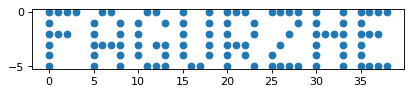

In [ ]:
findHiddenCode(dots, folds)

## Day 14

In [ ]:
data = open(
    '/content/drive/MyDrive/Colab Notebooks/AOC/2021/day14.txt',
    'r').read().split("\n\n")

template = data[0]
insertionMap = {}

for line in data[1].split("\n"):
    k, v = line.split(" -> ")
    print(k, v)
    insertionMap[k] = v

SB B
HH P
VF N
BS S
NC C
BF H
BN H
SP H
BK H
FF N
VN B
FN C
FS S
PP F
ON H
FV F
KO F
PK H
VB S
HS B
NV O
PN S
VH B
OS P
BP H
OV B
HK S
NN K
SV C
PB F
SK F
FB S
NB K
HF P
FK K
KV P
PV F
BC S
FO N
HC F
CP B
KK F
PC S
HN O
SH H
CK P
CO F
HP K
PS C
KP F
OF K
KS F
NO V
CB K
NF N
SF F
SC P
FC V
BV B
SS O
KC K
FH C
OP C
CF K
VO V
VK H
KH O
NP V
NH O
NS V
BH C
CH S
CC F
CS P
SN F
BO S
NK S
OO P
VV F
FP V
OK C
SO H
KN P
HO O
PO H
VS N
PF N
CV F
BB H
VC H
HV B
CN S
OH K
KF K
HB S
OC H
KB P
OB C
VP C
PH K


In [ ]:
print(template)

SCVHKHVSHPVCNBKBPVHV


In [ ]:
from collections import Counter
def findPairInsertionResult(template, insertionMap, steps):
    for i in range(steps):
        temp = [*template] # list of chars in template
        numInsertions = 0
        for j in range(len(template)-1):
            pair = template[j:j+2]
            try:
                elementToInsert = insertionMap[pair]
                temp.insert(j+1+numInsertions, elementToInsert)
                numInsertions += 1
            except KeyError:
                continue
        print(i+1, temp)
        template = ''.join(temp)

    counts = Counter(temp)
    return max(counts.values()) - min(counts.values())

In [ ]:
findPairInsertionResult(template, insertionMap, 10)

1 ['S', 'P', 'C', 'F', 'V', 'B', 'H', 'S', 'K', 'O', 'H', 'B', 'V', 'N', 'S', 'H', 'H', 'K', 'P', 'F', 'V', 'H', 'C', 'S', 'N', 'K', 'B', 'H', 'K', 'P', 'B', 'H', 'P', 'F', 'V', 'B', 'H', 'B', 'V']
2 ['S', 'H', 'P', 'S', 'C', 'K', 'F', 'F', 'V', 'S', 'B', 'C', 'H', 'B', 'S', 'F', 'K', 'F', 'O', 'K', 'H', 'S', 'B', 'B', 'V', 'B', 'N', 'V', 'S', 'H', 'H', 'P', 'H', 'S', 'K', 'F', 'P', 'N', 'F', 'F', 'V', 'B', 'H', 'F', 'C', 'P', 'S', 'F', 'N', 'S', 'K', 'P', 'B', 'C', 'H', 'S', 'K', 'F', 'P', 'F', 'B', 'C', 'H', 'K', 'P', 'N', 'F', 'F', 'V', 'S', 'B', 'C', 'H', 'S', 'B', 'B', 'V']
3 ['S', 'H', 'H', 'K', 'P', 'C', 'S', 'P', 'C', 'P', 'K', 'K', 'F', 'N', 'F', 'F', 'V', 'N', 'S', 'B', 'B', 'S', 'C', 'S', 'H', 'S', 'B', 'S', 'S', 'F', 'F', 'K', 'K', 'K', 'F', 'N', 'O', 'C', 'K', 'O', 'H', 'B', 'S', 'B', 'B', 'H', 'B', 'B', 'V', 'S', 'B', 'H', 'N', 'O', 'V', 'N', 'S', 'H', 'H', 'P', 'H', 'K', 'P', 'K', 'H', 'B', 'S', 'F', 'K', 'K', 'F', 'V', 'P', 'S', 'N', 'N', 'F', 'N', 'F', 'F', 'V', 'S', '

2712

In [ ]:
from collections import defaultdict
def findPairInsertionResultOptimized(template, insertionMap, steps):
    polymerPairCounts = defaultdict(int)
    # build polymer as a dictionary of pair counts after 1st step
    # credits to AoC day 14 reddit thread for the idea
    for j in range(len(template)-1):
        pair = template[j:j+2]
        if pair in insertionMap: 
            pair_a, pair_b = pair[0] + insertionMap[pair], insertionMap[pair] + pair[-1]
            polymerPairCounts[pair_a] += 1
            polymerPairCounts[pair_b] += 1
    
    # At each step, for every matching pair in the insertion rule, we add
    # new pairs according to the insertion rule i.e. for AB -> C rule, we have 
    # {"AB": 3} -> {"AC": 3, "CB": 3}.
    for k in range(1, steps):
        newPairCounts = defaultdict(int)
        for pair, count in polymerPairCounts.items():
            if pair in insertionMap:
                pair_a, pair_b = pair[0] + insertionMap[pair], insertionMap[pair] + pair[-1]
                newPairCounts[pair_a] += count
                newPairCounts[pair_b] += count
        polymerPairCounts = newPairCounts
    
    for k, v in polymerPairCounts.items():
        print(k, v)
    letterCounts = defaultdict(int)
    # Count frequency of chars by the number of pairs it
    # appears in. Note that start of a pair is always a char
    # in the polymer
    for pair, count in polymerPairCounts.items():
        letterCounts[pair[0]] += count
    # 1st and last char in polymer after each step is always the same
    # from template but last char is not counted when counting 
    # frequency above.
    letterCounts[template[-1]] += 1

    return max(letterCounts.values()) - min(letterCounts.values())

In [ ]:
findPairInsertionResultOptimized(template, insertionMap, 40)

SH 264582693080
HH 135274203671
HP 204880860374
PH 151204173676
HK 169951768597
KP 183416389167
PK 127476293120
KH 133055913069
HS 164547737652
SK 130056101977
KF 4178876203286
FP 93813774387
KO 68085290549
OH 108967956283
HB 151766690239
BS 262175682172
SF 222197643810
FK 4051688117626
KK 4050721462679
FV 274293197325
VP 47948839757
FO 34823679832
OK 55738054963
SB 224709573283
SS 143817671887
FF 253862249197
VC 96844579887
CP 249454651584
FN 189702493605
NO 50375199592
OC 73060914086
CK 98098180546
BB 132272501078
SO 73552356601
OS 73552356601
NF 322773225755
VH 49513350164
HC 86884641326
CB 136030713782
BP 127530033415
FC 141435254275
CN 96993444025
NV 63671470126
VO 52695638108
BH 168131025897
HO 125464726639
OP 70448241116
PS 347746010581
NN 165019606604
VB 44799374701
HF 44441810250
KB 69574720758
CS 271245188607
SN 82334284638
OV 32549346211
VV 26945626865
BC 85948138637
CH 85948138637
OO 64173903008
PC 270996559016
NK 84358907840
KN 84358907840
VS 60818870873
PF 40919696524
PB 

8336623059567

## Day 15

In [ ]:
import numpy as np
data = open(
    '/content/drive/MyDrive/Colab Notebooks/AOC/2021/day15.txt',
    'r')

mat = []
for line in data.readlines():
    arr = list(line.rstrip())
    mat.append(list(map(int, arr)))

mat = np.array(mat, dtype = np.int8)
print(mat)

[[1 1 5 ... 1 8 2]
 [1 8 3 ... 1 4 2]
 [9 8 2 ... 1 1 4]
 ...
 [1 9 1 ... 6 3 1]
 [9 5 1 ... 1 7 9]
 [1 5 4 ... 5 9 1]]


In [ ]:
import heapq
def findLowestRiskLevel(input):
    '''Idea: Apply dijkstra's algorithm to find shortest path,
    with risk levels as distances.
    '''
    m, n = input.shape[0], input.shape[1]
    start, end = (0,0), (m-1,n-1)
    # initialize distance(risk) table
    D = np.matrix(np.ones((m, n)) * np.inf)
    # Set of visited nodes (node cloud)
    visited = set()
    D[start] = 0
    def findValidNeighbours(point, visited):
        neighbours = []
        i, j = point[0], point[1]
        for nei in [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]:
            if nei[0] < 0 or nei[0] >= m or nei[1] < 0 or nei[1] >= n:
                continue
            elif nei not in visited:
                neighbours.append(nei)
        return neighbours

    # initialize heap as priority queue
    Q = []
    Q.append([0, start]) # [priority(risk), node]
    while len(Q) > 0:
        # Get closest unvisited node to node cloud
        v = heapq.heappop(Q)[1]
        if v not in visited:
            visited.add(v)
        # update distances to neighbouring nodes
        for node in findValidNeighbours(v, visited):
            dist = D[v] + input[node]
            if dist < D[node]:
                D[node] = dist
                heapq.heappush(Q, [dist, node])
    print(D)
    return D[end]
        

In [ ]:
findLowestRiskLevel(mat)

[[  0.   1.   6. ... 274. 282. 281.]
 [  1.   9.   9. ... 273. 277. 279.]
 [ 10.  17.  11. ... 272. 273. 277.]
 ...
 [314. 314. 305. ... 404. 407. 408.]
 [320. 311. 306. ... 400. 407. 416.]
 [316. 315. 310. ... 405. 414. 415.]]


415.0

In [ ]:
def constructFullMap(input):
    rows, cols = input.shape[0], input.shape[1]
    fullMap = np.zeros((rows*5, cols*5))
    # construct 1st row-wise expansion 
    for k in range(5):
        fullMap[:rows, k*cols:(k+1)*cols] = input + k
    # construct 2nd to last row-wise expansion
    for k in range(1,5):
        fullMap[k*rows:(k+1)*rows, :] = fullMap[(k-1)*rows:k*rows, :] + 1
    # wrap range of values from 1-9 i.e. first convert range to 0-8,
    # wrap using modulo then shift back to range 1-9.
    # In general, to wrap range of values from a-b, use formula 
    # (x - a) % (b - a + 1) + a
    fullMap = (fullMap - 1) % 9 + 1
    return fullMap

In [ ]:
findLowestRiskLevel(constructFullMap(mat)) # part 2

[[0.000e+00 1.000e+00 6.000e+00 ... 1.735e+03 1.738e+03 1.744e+03]
 [1.000e+00 9.000e+00 9.000e+00 ... 1.738e+03 1.746e+03 1.750e+03]
 [1.000e+01 1.700e+01 1.100e+01 ... 1.743e+03 1.748e+03 1.756e+03]
 ...
 [1.777e+03 1.780e+03 1.776e+03 ... 2.839e+03 2.841e+03 2.850e+03]
 [1.781e+03 1.789e+03 1.781e+03 ... 2.848e+03 2.847e+03 2.855e+03]
 [1.786e+03 1.794e+03 1.785e+03 ... 2.852e+03 2.855e+03 2.864e+03]]


2864.0